In [166]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import datasets
import numpy as np

In [167]:
P1K_X = pd.read_csv('../Data/P1K_X.csv', index_col=0)

In [168]:
P1K_X.values

array([[-5.39931400e-02,  5.39931400e-02,  8.79043050e-01, ...,
        -1.55274772e+00, -1.89259848e+00, -1.83135889e+00],
       [-6.19732545e-02,  6.19732545e-02,  1.06332988e+00, ...,
        -2.06002163e+00, -2.34852392e+00, -2.12277220e+00],
       [-3.69719740e-02,  3.69719740e-02,  3.13155700e-03, ...,
        -1.57783331e+00, -1.38352066e+00, -1.52707855e+00],
       ...,
       [-3.95520480e-02,  3.95520480e-02, -1.29002115e+00, ...,
        -5.34742325e-01,  3.94488833e-02, -5.13727915e-02],
       [-2.35166160e-01,  2.35166160e-01,  2.62164861e+00, ...,
         3.41394017e+00,  1.91451536e+00,  1.56451836e+00],
       [ 3.64790109e-01, -3.64790108e-01, -1.58595380e+00, ...,
        -5.94895968e-01, -6.02305536e-01,  9.14861341e-01]])

In [198]:
from FLAME import FLAME
clusterer = FLAME(cluster_neighbors=3, iteration_neighbors=3, verbose=0)
clusterer = clusterer.fit(P1K_X.values)
pred = clusterer.labels_

In [199]:
len(pred)

4257

In [200]:
pred.max()

198

In [201]:
pred

array([  0,   0, 132, ..., 145,  62, 100])

In [202]:
gene_names = P1K_X.index

In [203]:
# Create a presence matrix
unique_pred_values = np.unique(pred)
FLAME_presence_matrix = pd.DataFrame(
    0,
    index=gene_names,
    columns=unique_pred_values
)

# Fill the matrix with 1s for presence
for i, gene in enumerate(gene_names):
    FLAME_presence_matrix.loc[gene, pred[i]] = 1

In [204]:
FLAME_presence_matrix = FLAME_presence_matrix.drop(FLAME_presence_matrix.columns[0], axis=1)

In [205]:
FLAME_presence_matrix

,0,1,2,3,4,5,6,7,8,9,...,189,190,191,192,193,194,195,196,197,198
b0002,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
b0003,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
b0004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
b0005,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
b0006,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
b4747,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
b4748,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
b4751,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
b4755,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


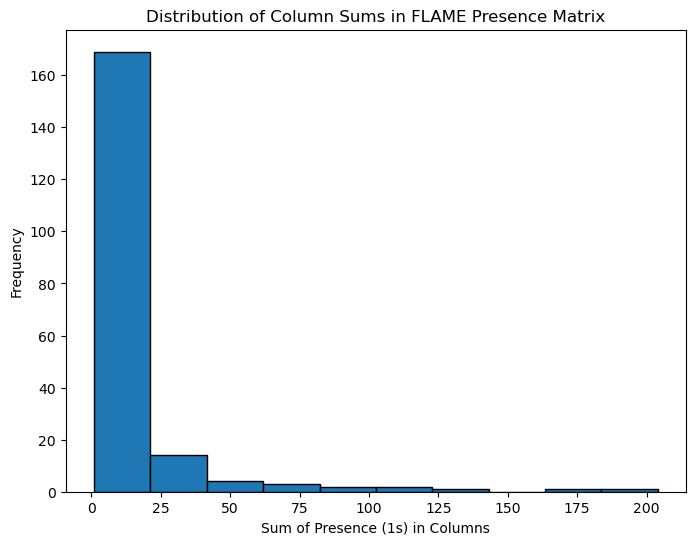

In [212]:
# Calculate the sum for each column
column_sums = FLAME_presence_matrix.sum(axis=0)

# Create a histogram for the distribution of column sums
plt.figure(figsize=(8, 6))
plt.hist(column_sums.values, bins=10, edgecolor="black")
plt.title("Distribution of Column Sums in FLAME Presence Matrix")
plt.xlabel("Sum of Presence (1s) in Columns")
plt.ylabel("Frequency")
plt.show()

In [213]:
new_column_names = [f"Component_{i+1}" for i in range(FLAME_presence_matrix.shape[1])]
FLAME_presence_matrix.columns = new_column_names

In [214]:
FLAME_presence_matrix.to_csv('Presence_Matrices/FLAME_ICA_Gene_Presence_Matrix.csv')

In [215]:
def count_genes_in_clusters(matrix):
    """
    Calculates how many of the genes are present in at least one cluster.

    Args:
    matrix (pd.DataFrame): The presence matrix with genes as rows and components as columns.

    Returns:
    int: Number of genes present in at least one cluster.
    """
    # Check if any gene has a presence (1) in any of the clusters (columns)
    genes_in_clusters = (matrix.sum(axis=1) > 0).sum()
    return genes_in_clusters

# Calculate the number of genes in any cluster for FLAME_presence_matrix
genes_in_clusters_count = count_genes_in_clusters(FLAME_presence_matrix)

print(f"The number of genes present in at least one cluster is: {genes_in_clusters_count}")

The number of genes present in at least one cluster is: 3076
